# DSA5104 Project Exploratory Data Analysis

In [68]:
filename_reviews = 'reviews.csv'

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
reviews = pd.read_csv(filename_reviews, dtype = str)

## 1. Reviews
- We have null value in reviewer_name and comments;
- File 'Reviews_summary' only records 'date' attribute of the original file;
- It is attached with the language type with the commonts

In [5]:
# Save the name of attributes
reviews_columns = reviews.columns.tolist()
reviews_columns

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

In [6]:
# check null value
for column in reviews_columns:
    print(reviews[column].isnull().values.any())

False
False
False
False
True
True


In [7]:
from langdetect import detect

In [8]:
pd.concat([reviews, pd.DataFrame(columns=['l_type'])], sort=False)

,listing_id,id,date,reviewer_id,reviewer_name,comments,l_type
0,39544047,564106023,2019-11-15,273940743,Kim,"Good communication, basic and clean accommodation",NaN
1,39544047,566622127,2019-11-20,143251478,Oliver,"Good, clean, cheap accomodation in proximity t...",NaN
2,39544047,568138380,2019-11-24,288635322,Doris,"A nice room, very close to impact arena, also ...",NaN
3,39544047,568816394,2019-11-24,163790201,Yang,The landlord sister is really kind and lovely....,NaN
4,39544047,597651173,2020-01-26,317920443,Kunat,"The room was very new, cleand and well funishe...",NaN
...,...,...,...,...,...,...,...
246639,25650511,546028757839670443,2022-01-23,9395774,Michael,Great place! Loved the gym and the pool. LOVED...,NaN
246640,25650511,575030942853820235,2022-03-04,112523712,Akira,綺麗に整理整頓されており食器類あり必要なものはすべて揃っています窓からの眺めもいいです おす...,NaN
246641,25650511,580846849788103547,2022-03-12,301320803,Xylis,"Frank was very kind and patient, I am so happy...",NaN
246642,25650511,619167599448170428,2022-05-04,453549937,Premkamon,"The place exactly the same as photos, very nic...",NaN


In [9]:
for i in range(len(reviews)):
    try:
        text = reviews.loc[i, 'comments']
        reviews.loc[i, 'l_type'] = detect(text)
        if i%1000 == 0:
            print(i)
    except Exception as e:
        print(i)
        reviews.loc[i, 'l_type'] = 'others'
        pass

0
81
978
980
1000
1518
2000
3000
3134
3135
3137
3138
3140
3145
3597
3616
3624
3627
3628
3634
4000
5000
6000
6937
7000
8000
8161
8162
8164
8166
8167
8168
8172
8175
8180
9000
9015
10000
10751
11000
11725
11726
11727
11730
11731
12000
12167
12169
12170
12171
12172
12173
12174
12175
13000
14000
14085
15000
15931
15953
15959
15960
15962
15964
16000
17000
17191
17335
18000
18109
18453
18454
18455
18456
19000
19679
20000
20383
20513
21000
22000
23000
23895
23930
24000
24282
24961
25000
25689
26000
26935
27000
27083
27084
27085
27095
27097
27796
27798
27800
27803
27804
28000
28092
28378
29000
29150
29261
29262
30000
30532
31000
31331
32000
32123
33000
33383
34000
34390
34883
35000
36000
36789
36813
37000
38000
38079
38427
38588
39000
39512
39517
39518
39519
39520
39742
39980
40000
40219
40254
41000
42000
42347
43000
43985
44000
44608
45000
45251
45543
45611
46000
46037
46635
47000
48000
48628
48692
49000
49134
50000
50951
50970
51000
51254
51381
51830
51869
52000
52046
52372
53000
53071
53590


In [13]:
reviews.to_csv("reviews_new.csv")

- We can open the file with attached 'language type'. 

In [72]:
reviews = pd.read_csv('reviews_new.csv', dtype = str)

In [73]:
languages = reviews['l_type'].value_counts()
index = languages.index
print(len(languages),'\n',languages)

45 
 en        169714
zh-cn      41764
ko         10855
fr          4738
de          2740
th          2319
ja          2224
zh-tw       2062
ru          1487
es          1248
so          1223
ro          1018
af           718
others       702
it           464
pl           412
nl           369
cs           339
ca           273
no           247
pt           241
vi           206
tl           184
id           176
cy           145
da           117
sv           112
hr            84
fi            79
et            67
sk            49
tr            47
sw            44
ar            41
hu            34
sl            34
el            11
bg            11
he            10
lt             9
uk             8
sq             6
mk             6
lv             4
ur             3
Name: l_type, dtype: int64


Text(0.5, 0, 'language')

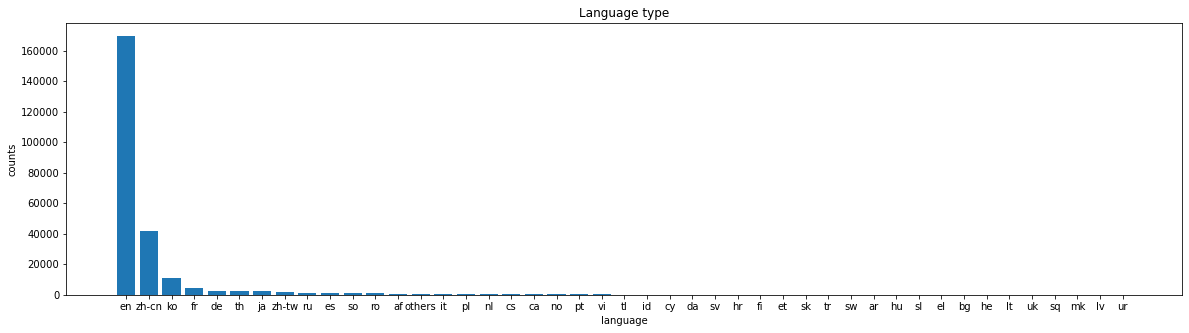

In [74]:
plt.figure(figsize = (20, 5))
plt.bar(range(len(languages)), languages, tick_label = index)
plt.title('Language type')
plt.ylabel('counts')
plt.xlabel('language')

In [75]:
listing_count = reviews.groupby('listing_id')['id'].count().reset_index().sort_values('id',ascending=False)

Text(0.5, 0, 'listing_id')

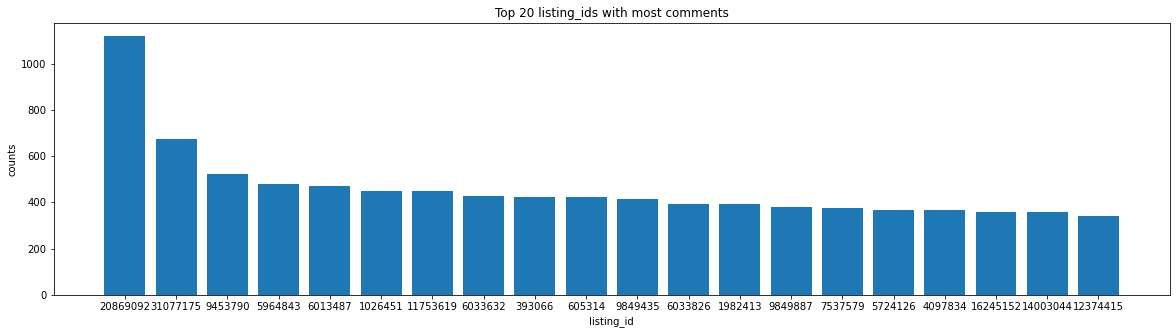

In [76]:
plt.figure(figsize = (20, 5))
plt.bar(range(20), listing_count['id'][0: 20], tick_label = listing_count['listing_id'][0: 20])
plt.title('Top 20 listing_ids with most comments')
plt.ylabel('counts')
plt.xlabel('listing_id')

In [77]:
reviewer_count = reviews.groupby('reviewer_id')['id'].count().reset_index().sort_values('id',ascending=False)

Text(0.5, 0, 'reviewer_id')

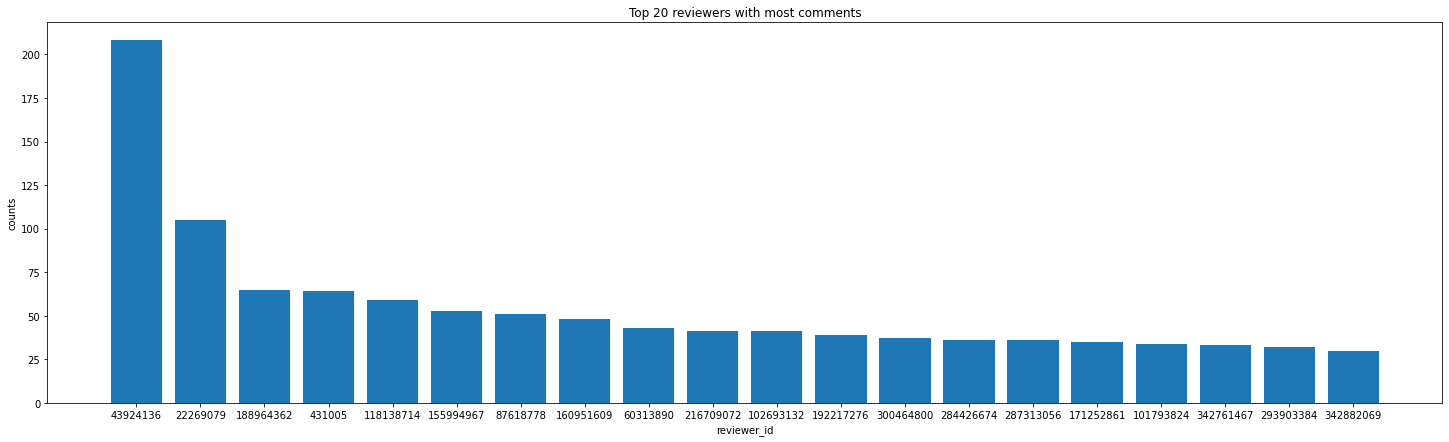

In [78]:
plt.figure(figsize = (25, 7))
plt.bar(range(20), reviewer_count['id'][0: 20], tick_label = reviewer_count['reviewer_id'][0: 20])
plt.title('Top 20 reviewers with most comments')
plt.ylabel('counts')
plt.xlabel('reviewer_id')

In [79]:
# show the reviewer who has the most comments
pd.set_option('display.max_rows',None)
reviews[(reviews.reviewer_id == '431005')].sort_values(by = 'date') # 43924136 22269079

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,l_type
3826,3826,1887544,9121130,2013-12-08,431005,W,Perfect place to stay in Bangkok. Salvatore's ...,en
3827,3827,1887544,9206725,2013-12-13,431005,W,Superb place to stay. The host Salvatore and h...,en
14021,14021,858311,9990992,2014-01-23,431005,W,I spent almost a week at Don's place and i lov...,en
9184,9184,2166902,10703874,2014-03-03,431005,W,I am glad that Jay is in Airbnb host community...,en
1718,1718,1041976,11475410,2014-04-04,431005,W,The host is so wonderful. She picked me up fro...,en
1720,1720,1041976,15114387,2014-07-02,431005,W,Lovely host and the space is very pretty. Host...,en
3896,3896,1887544,16754353,2014-08-01,431005,W,My second time staying in this place and i lov...,en
408,408,993085,21261518,2014-10-13,431005,W,"The place is in good location, very quiet, coz...",en
1006,1006,1744248,22928695,2014-11-17,431005,W,"Nol is a great host! Nol is very polite, hospi...",en
30506,30506,6164354,33558168,2015-05-29,431005,W,The unit was very nice and clean with a pretty...,en


In [80]:
first_reviwer_listing = reviews[(reviews.reviewer_id == '43924136')].groupby('listing_id')['id'].count().reset_index().sort_values('id',ascending=False)

Text(0.5, 0, 'listing_id')

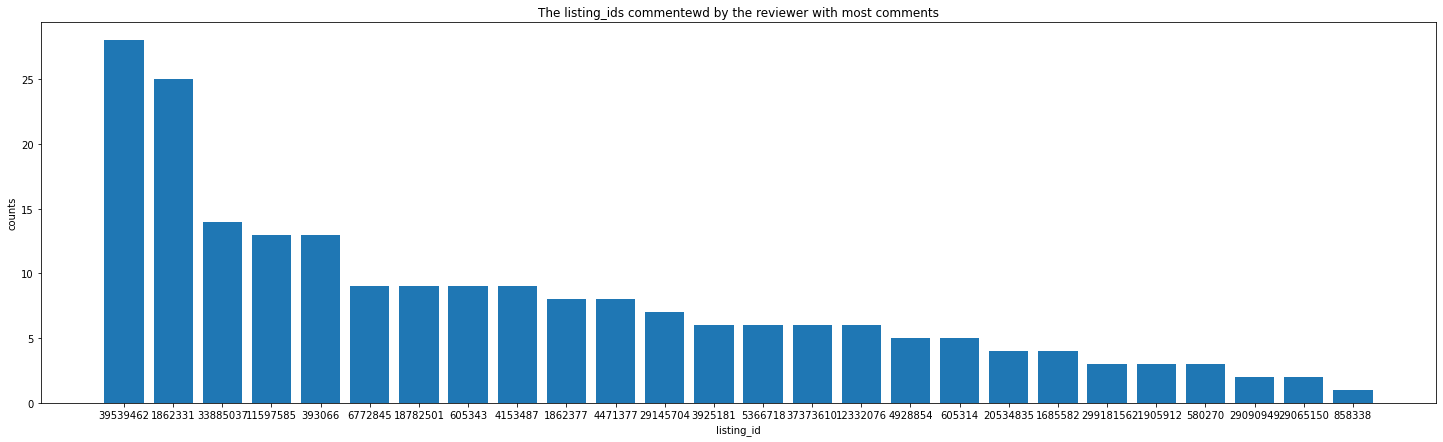

In [81]:
plt.figure(figsize = (25, 7))
plt.bar(range(len(first_reviwer_listing)), first_reviwer_listing['id'], tick_label = first_reviwer_listing['listing_id'])
plt.title('The listing_ids commentewd by the reviewer with most comments')
plt.ylabel('counts')
plt.xlabel('listing_id')

In [82]:
# show the reviewer who has the most comments and his/her comments on his/her most frequent staying
pd.set_option('display.max_rows',None)
reviews[(reviews.reviewer_id == '43924136') & (reviews.listing_id == '39539462')].sort_values(by = 'date') 

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,l_type
226564,226564,39539462,556994726,2019-10-31,43924136,Bo-Ther & Paa Maa,This is a great place if you are traveling wit...,en
226565,226565,39539462,559903199,2019-11-05,43924136,Bo-Ther & Paa Maa,This is a great discovery - in the heart of Sa...,en
226566,226566,39539462,560507630,2019-11-07,43924136,Bo-Ther & Paa Maa,i love staying here! and with the extension of...,en
226567,226567,39539462,560839870,2019-11-08,43924136,Bo-Ther & Paa Maa,I have stayed in a lot of places in Bangkok an...,en
226568,226568,39539462,561785155,2019-11-10,43924136,Bo-Ther & Paa Maa,Perfection - newly and smartly remodeled and ...,en
226569,226569,39539462,563506709,2019-11-13,43924136,Bo-Ther & Paa Maa,very large - big room and large bathroom (with...,en
226571,226571,39539462,564508982,2019-11-16,43924136,Bo-Ther & Paa Maa,"I have stayed here many times, in this room, a...",en
226572,226572,39539462,566322003,2019-11-19,43924136,Bo-Ther & Paa Maa,another great stay with Evan and his many opti...,en
226573,226573,39539462,567253333,2019-11-22,43924136,Bo-Ther & Paa Maa,I enjoyed this place a lot. Fast internet and ...,en
226574,226574,39539462,569284659,2019-11-26,43924136,Bo-Ther & Paa Maa,I enjoyed this place a lot. Fast internet and ...,en


- Find positions of all missing value

In [83]:
position = reviews.isnull().stack()[lambda x: x].index.tolist() 

In [84]:
position

[(20383, 'comments'),
 (58862, 'comments'),
 (61811, 'comments'),
 (79431, 'comments'),
 (92869, 'comments'),
 (105556, 'comments'),
 (125979, 'comments'),
 (130310, 'comments'),
 (134659, 'comments'),
 (156410, 'comments'),
 (157737, 'comments'),
 (165177, 'comments'),
 (167887, 'comments'),
 (167928, 'comments'),
 (185335, 'comments'),
 (212936, 'reviewer_name'),
 (213652, 'comments'),
 (222418, 'comments'),
 (231691, 'comments'),
 (235840, 'comments'),
 (239600, 'comments'),
 (240528, 'reviewer_name'),
 (241237, 'comments'),
 (241802, 'comments'),
 (242423, 'comments'),
 (246560, 'comments')]

- Populate with NULL

In [90]:
for item in position:
    index, attribute = item[0], item[1]
    reviews.loc[index, attribute] = 'NULL'

- Save the file

In [93]:
reviews.to_csv("reviews_new.csv")